## importing libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

## Feauture Engineering:

In [2]:
# Load the dataset (replace with your file path in Colab)
df = pd.read_csv(r"C:\Users\gowri\Downloads\complaints.csv\complaints.csv")

# Keep only the required columns
df_small = df[["Consumer complaint narrative", "Product"]]

# Drop rows where complaint narrative is missing
df_small = df_small.dropna(subset=["Consumer complaint narrative"]).reset_index(drop=True)

# Save to new CSV
df_small.to_csv("consumer_complaints_filtered.csv", index=False)

df_small.head()


,Consumer complaint narrative,Product
0,These are not my accounts.,"Credit reporting, credit repair services, or o..."
1,Kindly address this issue on my credit report....,Credit reporting or other personal consumer re...
2,There are XXXX collections being reported to t...,Credit reporting or other personal consumer re...
3,"Good day, filing this complaint to follow up m...",Credit reporting or other personal consumer re...
4,I am writing to have the following information...,Credit reporting or other personal consumer re...


## Loading dataframe:

In [5]:
df=pd.read_csv('consumer_complaints_filtered.csv')
df.head()

,Consumer complaint narrative,Product
0,These are not my accounts.,"Credit reporting, credit repair services, or o..."
1,Kindly address this issue on my credit report....,Credit reporting or other personal consumer re...
2,There are XXXX collections being reported to t...,Credit reporting or other personal consumer re...
3,"Good day, filing this complaint to follow up m...",Credit reporting or other personal consumer re...
4,I am writing to have the following information...,Credit reporting or other personal consumer re...


## Missing values:

In [7]:
print("\nMissing values in the dataset:")
missing_values = df.isnull().sum() # Replace X with df
print(missing_values)


Missing values in the dataset:
Consumer complaint narrative    0
Product                         0
dtype: int64


## Feature Scaling:

In [8]:
# Get unique categories in 'Product' column
categories = df["Product"].unique()

# Print categories
print("Unique categories in 'Product':")
for i, cat in enumerate(categories, 1):
    print(f"{i}. {cat}")

# Also show how many unique categories exist
print("\nTotal unique categories:", df["Product"].nunique())

Unique categories in 'Product':
1. Credit reporting, credit repair services, or other personal consumer reports
2. Credit reporting or other personal consumer reports
3. Credit card or prepaid card
4. Money transfer, virtual currency, or money service
5. Prepaid card
6. Debt collection
7. Credit card
8. Payday loan, title loan, or personal loan
9. Mortgage
10. Checking or savings account
11. Vehicle loan or lease
12. Payday loan, title loan, personal loan, or advance loan
13. Student loan
14. Credit reporting
15. Bank account or service
16. Debt or credit management
17. Consumer Loan
18. Payday loan
19. Money transfers
20. Other financial service
21. Virtual currency

Total unique categories: 21


## required categories
1. Credit reporting, credit repair services, or other personal consumer reports
2. Credit reporting or other personal consumer reports
14. Credit reporting
6. Debt collection
17. Consumer Loan
9. Mortgage

## Assign labels

In [9]:
# Categories you want to keep
categories_to_keep = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Credit reporting or other personal consumer reports",
    "Credit reporting",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]

# Filter dataset for only these categories
df_filtered = df[df["Product"].isin(categories_to_keep)].reset_index(drop=True)

print("Dataset shape after filtering:", df_filtered.shape)
print("Unique categories in filtered dataset:", df_filtered["Product"].unique())

# --- Map categories into numeric labels (0–3) ---
category_mapping = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Credit reporting or other personal consumer reports": 0,
    "Credit reporting": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}

# Apply mapping
df_filtered["Label"] = df_filtered["Product"].map(category_mapping)

# Save filtered dataset
df_filtered.to_csv("consumer_complaints_classification_ready.csv", index=False)

print("\nSample of final dataset:")
print(df_filtered.head())

Dataset shape after filtering: (2750824, 2)
Unique categories in filtered dataset: ['Credit reporting, credit repair services, or other personal consumer reports'
 'Credit reporting or other personal consumer reports' 'Debt collection'
 'Mortgage' 'Credit reporting' 'Consumer Loan']

Sample of final dataset:
                        Consumer complaint narrative  \
0                         These are not my accounts.   
1  Kindly address this issue on my credit report....   
2  There are XXXX collections being reported to t...   
3  Good day, filing this complaint to follow up m...   
4  I am writing to have the following information...   

                                             Product  Label  
0  Credit reporting, credit repair services, or o...      0  
1  Credit reporting or other personal consumer re...      0  
2  Credit reporting or other personal consumer re...      0  
3  Credit reporting or other personal consumer re...      0  
4  Credit reporting or other personal consu

In [3]:
df=pd.read_csv('consumer_complaints_classification_ready.csv')
df.head()

,Consumer complaint narrative,Product,Label
0,These are not my accounts.,"Credit reporting, credit repair services, or o...",0
1,Kindly address this issue on my credit report....,Credit reporting or other personal consumer re...,0
2,There are XXXX collections being reported to t...,Credit reporting or other personal consumer re...,0
3,"Good day, filing this complaint to follow up m...",Credit reporting or other personal consumer re...,0
4,I am writing to have the following information...,Credit reporting or other personal consumer re...,0


## check categories

In [3]:
# Get unique categories in 'Product' column
categories = df["Product"].unique()

# Print categories
print("Unique categories in 'Product':")
for i, cat in enumerate(categories, 1):
    print(f"{i}. {cat}")

# Also show how many unique categories exist
print("\nTotal unique categories:", df["Product"].nunique())

Unique categories in 'Product':
1. Credit reporting, credit repair services, or other personal consumer reports
2. Credit reporting or other personal consumer reports
3. Debt collection
4. Mortgage
5. Credit reporting
6. Consumer Loan

Total unique categories: 6


In [4]:
# Check unique labels
print("Unique labels:", df["Label"].unique())

# Count of each label
print("\nLabel distribution:")
print(df["Label"].value_counts())

# Count with category names for clarity
print("\nLabel distribution with category names:")
print(df.groupby("Label")["Product"].value_counts())

Unique labels: [0 1 3 2]

Label distribution:
Label
0    2239288
1     367680
3     134395
2       9461
Name: count, dtype: int64

Label distribution with category names:
Label  Product                                                                     
0      Credit reporting or other personal consumer reports                             1400424
       Credit reporting, credit repair services, or other personal consumer reports     807277
       Credit reporting                                                                  31587
1      Debt collection                                                                  367680
2      Consumer Loan                                                                      9461
3      Mortgage                                                                         134395
Name: count, dtype: int64


## Visualize distribution

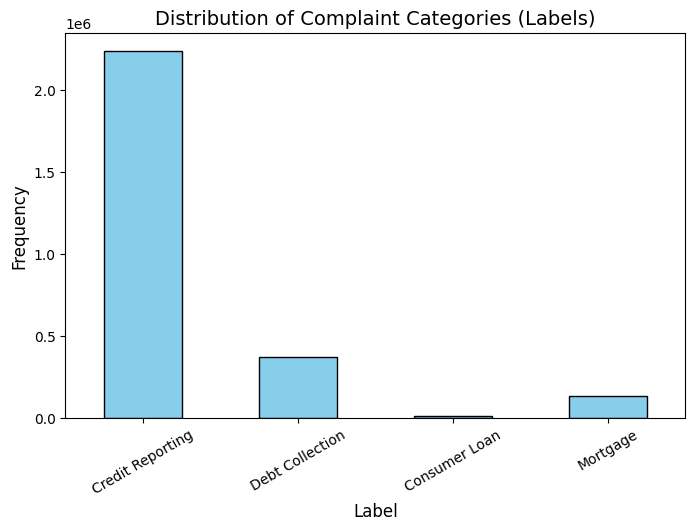

In [4]:
# Plot histogram of label frequencies
plt.figure(figsize=(8,5))
df["Label"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Complaint Categories (Labels)", fontsize=14)
plt.xticks([0,1,2,3], ["Credit Reporting", "Debt Collection", "Consumer Loan", "Mortgage"], rotation=30)

# Show plot
plt.show()

## hybrid sampling

In [5]:
# Features (raw text) and labels
X = df[["Consumer complaint narrative"]]   # keep as DataFrame for resampling
y = df["Label"]

print("Original distribution:\n", y.value_counts(), "\n")

# Step 1: Define strategy
# Undersample large classes (0 and 1)
under = RandomUnderSampler(sampling_strategy={0:300000, 1:300000}, random_state=42)

# Oversample small classes (2 and 3)
over = RandomOverSampler(sampling_strategy={2:300000, 3:300000}, random_state=42)

# Step 2: Apply undersampling
X_resampled, y_resampled = under.fit_resample(X, y)

# Step 3: Apply oversampling
X_resampled, y_resampled = over.fit_resample(X_resampled, y_resampled)

# Step 4: Check new balanced distribution
print("Balanced distribution:\n", pd.Series(y_resampled).value_counts())

Original distribution:
 Label
0    2239288
1     367680
3     134395
2       9461
Name: count, dtype: int64 

Balanced distribution:
 Label
0    300000
1    300000
2    300000
3    300000
Name: count, dtype: int64


In [ ]:
## load final balanced dataset

In [ ]:
# Combine features and labels back into a single DataFrame
df_resampled = pd.concat([X_resampled, pd.Series(y_resampled, name="Label")], axis=1)

# Save to CSV
output_path = "consumer_complaints_sampled.csv"
df_resampled.to_csv(output_path, index=False, encoding="utf-8")